Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Если их меньше 3,то можешь учесть это при выполнении следующих работ.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
Сергей, возможно ты отправил не ту версию проекта? С таким оформление никак не могу принять работу. Пожалуйста внеси правки и конечно же жду вопросы от тебя
</div>

## Подготовка

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor,Pool
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import time
import warnings
warnings.filterwarnings('ignore')




## Анализ

Прочитаем файл, создадим ДатаФрейм, выведем таблицу. Столбец datetime приведем к формату даты и переведем в индекс через index_col, parse_dates:

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
data = data.sort_index()

Проверим, в хронологическом ли порядке расположены даты и время, посмотрим атрибут индекса таблицы is_monotonic:

In [6]:
data.index.is_monotonic

True

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Отлично!
</div>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


Построим график временного ряда

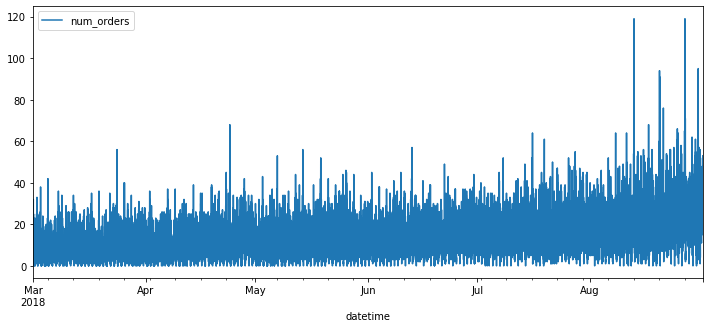

In [8]:
data.plot(figsize=(12,5))

Проведем Ресемплирование - изменение временного ряда на часовой и вычислим агрегированное значение ряда по .sum():

In [9]:
data = data.resample('1H').sum()
data

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


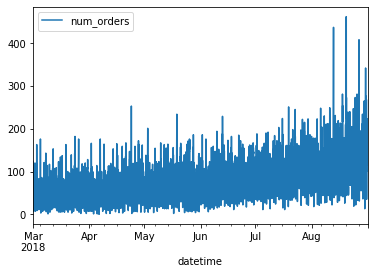

In [10]:
data.plot()

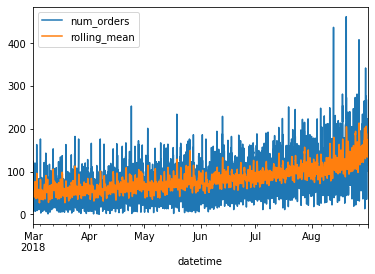

In [11]:
data['rolling_mean'] = data.rolling(10).mean()
data.plot()

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Что мы видим на графиках? Какие выводы можем сделать? 
</div>

Посмотрим на тренд и сезонность данных с помощью функции seasonal_decompose(). Она раскладывает временной ряд на три составляющие: тренд, сезонность и остаток

In [12]:
data = data.resample('1H').sum()
decomposed = seasonal_decompose(data)

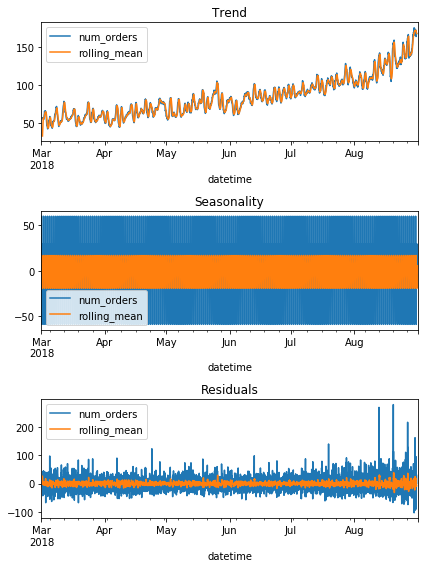

In [13]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) # < напишите код здесь >
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) # < напишите код здесь >
plt.title('Residuals')
plt.tight_layout()


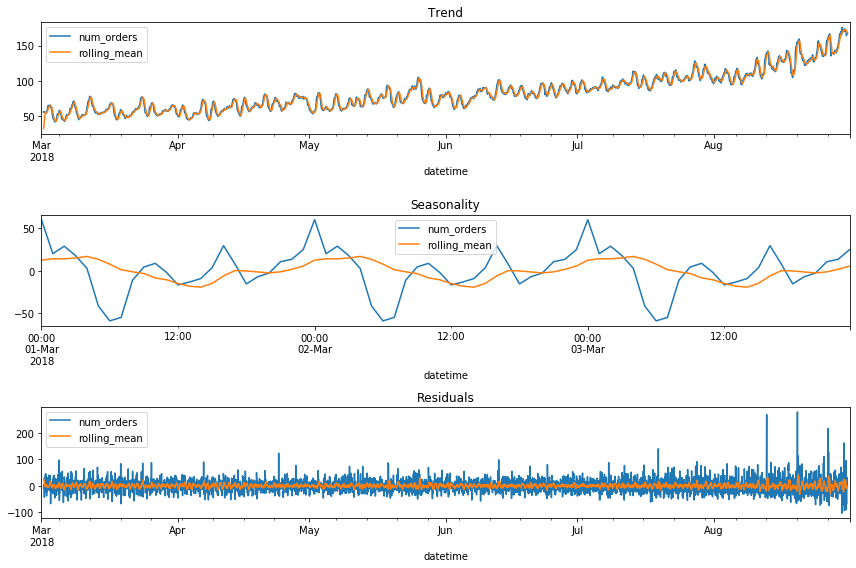

In [14]:
plt.figure(figsize=(12, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-03'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

По графику сезонности можно отметить переодичность: пик загрузки приходится в полночь, минимум в 6 утра. Также наблюдается локальный максимум днем.

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Конец главы, а выводов нет( 
    
Что интересного мы можем увидеть в данных графиках? Какие фичи стоит создавать?</div>

Вывод:

В процессе загрузки и обработки данных обнаружили:

Среднее меняется с течением времени. Данные представляют собой нестационарный временной ряд. Прогнозировать такие ряды сложнее: свойства меняются слишком быстро.

## Обучение

<div class="alert alert-block alert-info">Беря во внимание замечания, я переделал 3 и 4 раздел, по совету коллег использовал TimeSeriesSplit/</div>

<div class="alert alert-success">
    
**Комментарий ревьюера(Хорошо) v_2**
     
Отлично, правильное решение
</div>

При анализе ряда мы убедились в наличии "сезонности". Есть смысл добавить дополнительные признаки перед обучением моделей. Также, для определения, будет функция расти или уменьшаться заполним недостающие значения.

In [15]:

def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['day'] = data.index.day
    data['month'] = data.index.month
    data['week'] = data.index.week
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Почему выбрал именно такой размер лага?Какие еще варианты рассматривались?
</div>

 Напишем ее функцию для кросс-валидации.

In [16]:
def rmse(predict, actual):
    score = np.sqrt(mean_squared_error(actual, predict))
    return score

Обучим модели с подбором лучшего lag

1. Обучим модель Линейная регрессия

In [17]:
%%time
best_result = 10000
best_lag = 0
best_LinearRegression = None
for i in range(1, 100):
    df = data.copy() #копируем оригинальный датасет для добавления признаков
    make_features(df, i, 10)
    
    train, test = train_test_split(df, shuffle=False, test_size=0.1)
    train = train.dropna()

    target_train = train['num_orders']
    features_train = train.drop('num_orders', axis=1)
    target_test = test['num_orders']
    features_test = test.drop('num_orders',axis=1)

    lr = LinearRegression()
    lr.fit(features_train, target_train)

    tss = TimeSeriesSplit(max_train_size=None, n_splits=8)
    rmse_score = make_scorer(rmse, greater_is_better = False)
    scores = cross_val_score(lr, features_train, target_train, cv=tss , scoring=rmse_score)
    result = scores.mean() * -1
    if result < best_result:
        best_lag = i
        best_result = result
        best_LinearRegression = lr
print('Best lag:', best_lag)  
print('Best RMSE:', best_result)
#    print(f'RMSE на кроссвалидации: {scores.mean() * -1}')

Best lag: 73
Best RMSE: 23.71528446449377
CPU times: user 1min 3s, sys: 1min 27s, total: 2min 30s
Wall time: 2min 30s


<div class="alert alert-success">
    
**Комментарий ревьюера(Хорошо) v_2**
     
Отличная идея с кросс-валидацией, молодец
</div>

2. Обучим модель градиентного бустинга LightGBM

In [31]:
%%time
lgb_train = lgb.Dataset(features_train, target_train)
lgb_test = lgb.Dataset(features_test, target_test, reference=lgb_train)

params = {
    'boosting': 'GBDT',
    'metric': 'rmse',
    'num_leaves': 100,
    'verbose': -1,
#    'force_row_wise': True,
    'max_depth':10
#    'force_col_wise': True
}


gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_test,
                verbose_eval=False
                )

test_predict = gbm.predict(features_train, num_iteration=gbm.best_iteration)
rmse_train = mean_squared_error(target_train, test_predict) ** 0.5
print(f'RMSE на обучающей выборке: {rmse_train}')
target_predict = gbm.predict(features_test, num_iteration=gbm.best_iteration)

rmse_test = mean_squared_error(target_test, target_predict) ** 0.5
print(f'RMSE на тестовой выборке: {rmse_test}')

RMSE на обучающей выборке: 9.319718372701129
RMSE на тестовой выборке: 38.56483834892652
CPU times: user 7.96 s, sys: 0 ns, total: 7.96 s
Wall time: 8.04 s


<div class="alert alert-danger">
    
**Комментарий ревьюера(Ошибка)v_2**

1)Мы не должны на данном этапе подставлять тестовые данные. Используя трейн данные, мы должны обучить несколько моделей, проанализировать их и только потом тестировать

2)У тебя метрики отличаются в 4 раза, разве это нормально? Как думаешь, с чем это связано?
</div>

<div class="alert alert-block alert-info">Да, я обратил внимание, подумал, что сдела не верно, пытался сделать по-другому, но не вышло, код ниже, может подскажешь, что не верно я делаю, сам не могу разобраться...(</div>

<div class="alert alert-success">
    
**Комментарий ревьюера(Хорошо) v_3**
     
Смотри)
    
1) и самое главное, как уже писал выше, ты подставляешь тестовые данные, и это плохо)
    
2)Нужно или выделять дополнительно валидационную часть или делать кросс-валидацию
  
3)Ты забыл что можно переобучиться. Лучше останавливать обучение, когда результаты начинают отличаться больше чем на 10%(трейн и валидация)
</div>

In [ ]:

final_GBM = LGBMRegressor(depth=gsearch["params"]["depth"], 
                              learning_rate=gsearch["params"]['learning_rate'],
                              loss_function='RMSE',verbose=100)
final_GBM.fit(features_train,train_target)

In [ ]:
scoresLGB = cross_val_score(final_GBM, features_train, target_train, cv=tss , scoring=rmse_score)
resultLGB = scoresLGB.mean() * -1
print('RMSE на обучающей выборке', resultLGB.round(2))

Разделим выборки на features - признаки и target — целевой признак.


<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Сделал верно, молодец! 

А нужно ли трансформить тест? Разве не лучше после находки лучшей модели трейн и валид части объединить?
</div>

Запишем объединенные выборки в переменные train_valid_features и train_valid_target:

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Почему и для чего объединяем? Пожалуйста поясни
</div>

3. Обучим модель градиентного бустинга CatBoostRegressor

In [32]:
catboost = CatBoostRegressor(loss_function='RMSE',random_state = 12345)
parameters_cat = {'depth':[5,10], 'learning_rate':np.arange(0.1,1,0.2)}
catboost_grid = catboost.grid_search(parameters_cat,
            Pool(features_train,target_train),cv=tss,verbose=True)

0:	loss: 31.0397151	best: 31.0397151 (0)	total: 31.3s	remaining: 4m 41s
1:	loss: 31.5016688	best: 31.0397151 (0)	total: 1m 2s	remaining: 4m 11s
2:	loss: 33.2210049	best: 31.0397151 (0)	total: 1m 32s	remaining: 3m 36s
3:	loss: 32.3300769	best: 31.0397151 (0)	total: 2m 2s	remaining: 3m 4s
4:	loss: 32.0544973	best: 31.0397151 (0)	total: 2m 33s	remaining: 2m 33s
5:	loss: 35.5844279	best: 31.0397151 (0)	total: 8m 53s	remaining: 5m 55s
6:	loss: 36.8771217	best: 31.0397151 (0)	total: 15m 14s	remaining: 6m 31s
7:	loss: 40.3196215	best: 31.0397151 (0)	total: 21m 38s	remaining: 5m 24s
8:	loss: 42.0147673	best: 31.0397151 (0)	total: 28m	remaining: 3m 6s
9:	loss: 45.0418294	best: 31.0397151 (0)	total: 34m 17s	remaining: 0us
Estimating final quality...


In [33]:
%%time
final_cat = CatBoostRegressor(depth=catboost_grid["params"]["depth"], 
                              learning_rate=catboost_grid["params"]['learning_rate'],
                              loss_function='RMSE',verbose=100)
final_cat.fit(Pool(features_train,target_train))


0:	learn: 36.8883893	total: 3.99ms	remaining: 3.99s
100:	learn: 19.6347169	total: 3.27s	remaining: 29.1s
200:	learn: 16.5143416	total: 6.93s	remaining: 27.6s
300:	learn: 14.5764924	total: 10.3s	remaining: 23.9s
400:	learn: 13.0267868	total: 13.6s	remaining: 20.4s
500:	learn: 11.6107253	total: 16.9s	remaining: 16.8s
600:	learn: 10.3698247	total: 20.2s	remaining: 13.4s
700:	learn: 9.3162570	total: 23.4s	remaining: 10s
800:	learn: 8.3259118	total: 26.9s	remaining: 6.68s
900:	learn: 7.5088020	total: 30.2s	remaining: 3.31s
999:	learn: 6.7740937	total: 33.4s	remaining: 0us
CPU times: user 30.6 s, sys: 3.14 s, total: 33.7 s
Wall time: 34.8 s


In [34]:
scores = cross_val_score(final_cat, features_train, target_train, cv=tss , scoring=rmse_score)
resultCB = scores.mean() * -1

0:	learn: 27.3313995	total: 3.12ms	remaining: 3.12s
100:	learn: 8.5375198	total: 1.58s	remaining: 14.1s
200:	learn: 4.5250610	total: 3.26s	remaining: 12.9s
300:	learn: 2.2886334	total: 5.02s	remaining: 11.7s
400:	learn: 1.1236111	total: 6.61s	remaining: 9.87s
500:	learn: 0.5617427	total: 8.25s	remaining: 8.21s
600:	learn: 0.2909456	total: 9.93s	remaining: 6.59s
700:	learn: 0.1483693	total: 11.7s	remaining: 4.98s
800:	learn: 0.0746368	total: 13.4s	remaining: 3.32s
900:	learn: 0.0388632	total: 15s	remaining: 1.65s
999:	learn: 0.0196861	total: 16.7s	remaining: 0us
0:	learn: 27.8596605	total: 2.78ms	remaining: 2.77s
100:	learn: 11.4665585	total: 1.92s	remaining: 17.1s
200:	learn: 7.4440809	total: 3.8s	remaining: 15.1s
300:	learn: 5.1193201	total: 5.76s	remaining: 13.4s
400:	learn: 3.5933350	total: 7.63s	remaining: 11.4s
500:	learn: 2.5057107	total: 9.59s	remaining: 9.55s
600:	learn: 1.7276976	total: 11.5s	remaining: 7.61s
700:	learn: 1.2358132	total: 13.4s	remaining: 5.73s
800:	learn: 0.88

In [35]:
print('RMSE на обучающей выборке', resultCB.round(2))

RMSE на обучающей выборке 23.06


3.Обучим модель Случайный лес.

In [36]:
rfr = RandomForestRegressor()

grid_params = {
     'n_estimators' : [10,50,100],
    'max_features' : ['auto', 'log2', 'sqrt'],
     'max_depth' : [10,20,30]
  }
grid = GridSearchCV(rfr, param_grid=grid_params, cv=tss, 
n_jobs = 1, verbose = 0, return_train_score=True)
grid.fit(features_train, target_train)
print('Best hyper parameter:', grid.best_params_)

Best hyper parameter: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 100}


In [39]:
%%time
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth = 30,
)

rfr.fit(features_train, target_train)
scores = cross_val_score(rfr, features_train, target_train, scoring=rmse_score, cv=tss)
print(f'RMSE на кроссвалидации: {scores.mean() * -1}')

RMSE на кроссвалидации: 23.394689645164817
CPU times: user 1min 19s, sys: 0 ns, total: 1min 19s
Wall time: 1min 20s


<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
Во всех моделях ты допускаешь одну очень важную ошибку, которая не даст тебе получить хорошего результата.
    
Мы должны подбирать гиперпараметры смотря на метрики трейна и валидации. Чтобы они были наименьшими, НО не практически не отличались. Как только трейн значительно лучше валидации, значит у нас переобучение и на тесте всё будет плохо. Плюс, после того как мы получим нужную модель и лучшие гиперпараметры. Стоит объединить трейн и валидацию и обучить с данными гиперпараметрами модель заново. 
</div>

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Как будем защищаться от переобучения?
</div>

<div class="alert alert-block alert-info">Использовали кросс-валидацию и TimeSeriesSplit</div>

Вывод :

Наилучшие гиперпараметры найдены

Модели обучены

Подготовка к тестированию завершена

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Хорошо бы все результаты заполнять в таблицу, чтобы было удобно смотреть
    
Снова нет выводов
</div>

## Тестирование

Сделаем предсказания моделей на тестовой выборке и оценим их качество:

1 - LinearRegression

In [75]:
%%time
target_predict = lr.predict(features_test)
rmse_testLR = mean_squared_error(target_test, target_predict) ** 0.5
print(f'RMSE на тестовой выборке: {rmse_testLR}')

RMSE на тестовой выборке: 41.70370925599874
CPU times: user 8.98 ms, sys: 0 ns, total: 8.98 ms
Wall time: 2.62 ms


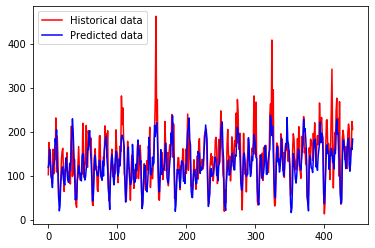

In [71]:
a=np.array(target_test, np.int32)
b=np.array(target_predict, np.int32)

plt.plot(a, color = 'red', label = 'Historical data')
plt.plot(b, color = 'blue', label='Predicted data')
plt.legend()
plt.show()

2-CatBoost

In [74]:
%%time
target_predict = final_cat.predict(features_test)
rmse_testCB = mean_squared_error(target_test, target_predict) ** 0.5
print(f'RMSE на тестовой выборке: {rmse_testCB}')

RMSE на тестовой выборке: 37.86061842028361
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 4.83 ms


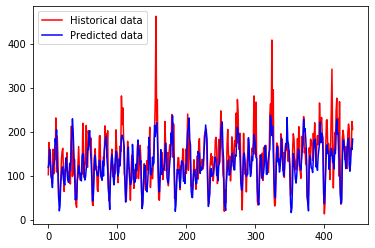

In [76]:
a=np.array(target_test, np.int32)
b=np.array(target_predict, np.int32)

plt.plot(a, color = 'red', label = 'Historical data')
plt.plot(b, color = 'blue', label='Predicted data')
plt.legend()
plt.show()

3-LGBM

In [78]:
%%time
target_predict = gbm.predict(features_test)
rmse_testLGBM = mean_squared_error(target_test, target_predict) ** 0.5
print(f'RMSE на тестовой выборке: {rmse_testLGBM}')

RMSE на тестовой выборке: 38.56483834892652
CPU times: user 18.6 ms, sys: 0 ns, total: 18.6 ms
Wall time: 15.2 ms


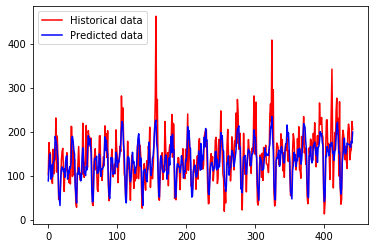

In [79]:
a=np.array(target_test, np.int32)
b=np.array(target_predict, np.int32)

plt.plot(a, color = 'red', label = 'Historical data')
plt.plot(b, color = 'blue', label='Predicted data')
plt.legend()
plt.show()

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Как и ожидалось, мы переобучились(
</div>

RandomForest

In [81]:
%%time
target_predict = rfr.predict(features_test)
rmse_testRF = mean_squared_error(target_test, target_predict) ** 0.5
print(f' RMSE на тестовой выборке: {rmse_testRF}')

 RMSE на тестовой выборке: 40.21926852715907
CPU times: user 15.7 ms, sys: 74 µs, total: 15.7 ms
Wall time: 14.4 ms


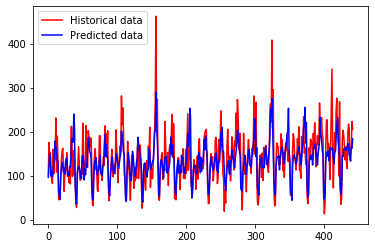

In [82]:
a=np.array(target_test, np.int32)
b=np.array(target_predict, np.int32)

plt.plot(a, color = 'red', label = 'Historical data')
plt.plot(b, color = 'blue', label='Predicted data')
plt.legend()
plt.show()

Составим таблицу, отражающая результаты исследования

In [83]:
data1 = {'Модель':['LinearRegression', 'CatBoost', 'LightGBM', 'RandomForest',], 
         'Метрика RMSE': [41.70, 37.86, 38.56, 40.21,]}

In [84]:

df1 = pd.DataFrame(data1)
df1

,Модель,Метрика RMSE
0,LinearRegression,41.70
1,CatBoost,37.86
2,LightGBM,38.56
3,RandomForest,40.21


ВЫВОД:


В таблице мы видим, что по условию RMSE нам подходят все модели, но наименьшую ошибку показала модель построенная на алгоритме CatBoost. По времени лучшая LGBM.

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Сергей, работа выглядит сырой. Пожалуйста ответь на мои вопросы и внеси корректировки. Если нужна помощь или есть вопросы, я всегда рад и готов помочь) Пожелания по доп материалам принимаются)
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера(Хорошо) v_2**
     
Сергей, уже лучше. Пожалуйста отвечай на мои вопросы. И самое главное задавай свои. Если нужна помощь, всегда рад. Исправлять немного, должны справиться за 1 итерацию)
    
    
https://www.youtube.com/watch?v=u433nrxdf5k&ab_channel=DataMininginAction

</div>

   <div class="alert alert-block alert-info">
        Валерий, спасибо за комментарии и помощь, вчера ночью отправил и не длбавил вопросы. Я хотел бонусом использовать метод fbprophet, нашел интересную статью, понимаю, что он "опирается" на другую метрику, но все же было интересно, нов тернажере у меня не загрузилась библиотека, а локально на ноуте при вызове fit умирает ядро, убил 4 часа, так и не разобрался..., может подскажешь, где литературу взять по этой библиотеке или что я не так делаю код выложу ниже. Есть еще такого рода вопрос, если мы например предсказывпем продажи запасных частей у нас получается не один же признак, как в задачи с такси заказ, а номенклатура из тысячи позицицй, как быть с такого рода задачей, может уже есть интересные решения с использованием библиотек и методов, которые мы изучили, буду рад инфы по этому поводу! За видео отдельное спасибо!!! </div>

<div class="alert alert-success">
    
**Комментарий ревьюера(Хорошо) v_3**
     
1)Интересная либа, круто что нашел) Вот видео, вроде какие-то базовые вещи рассказывает)Если плохо с английским можно через ябразуер перевод включить) https://www.youtube.com/watch?v=VtItg-J6-CI&ab_channel=KrishNaik
    
2)Про тысячи позиций: тут вопрос как мы будем ставить задачу. Советую посмотреть митапы х5 и амазона(например), они любят рассказывать как и что делают. Ну и конечно открытые решение на kaggle)
</div>

In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/datasets/taxi.csv')
df.info()

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
plt.plot(df['datetime'], df['num_orders']);
#df.plot(figsize=(12,5))

In [ ]:
df.rename(columns = {'datetime':'ds', 'num_orders':'y'}, inplace = True)
df

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
model = fbprophet.Prophet(yearly_seasonality = False,     weekly_seasonality = True,  seasonality_mode = 'multiplicative')

In [ ]:
model.fit(df)
#на этом моменте у меня выскакивает ошибка, которая убивает ядро...

In [ ]:
future = model.make_future_dataframe(periods = 30, freq = 'd')
forecast = model.predict(future)

<div class="alert alert-success">
    
**Комментарий ревьюера(Хорошо) v_3**
     
Сергей, проект принимаю, чтобы не терзать дедлайнами. Но очень прошу разобраться с материалом и прислать мне через куратора итоговую версию работы)Конечно же с вопросами)Успехов в следующих проектах!)
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48